<a href="https://colab.research.google.com/github/chakravartulavinay/Projects/blob/main/SMS_SPAM_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/spam.csv", encoding='ISO-8859-1')

In [ ]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3051,ham,Please leave this topic..sorry for telling that..,NaN,NaN,NaN
3649,ham,"We are hoping to get away by 7, from Langport....",NaN,NaN,NaN
4978,ham,Spending new years with my brother and his fam...,NaN,NaN,NaN
1513,ham,Hows the champ just leaving glasgow!,NaN,NaN,NaN
4390,ham,The greatest test of courage on earth is to be...,NaN,NaN,NaN


In [ ]:
data.shape

(5572, 5)

# 1.data cleaning
# 2. EDA
# 3. Text processing
# 4. Model building
# 5. evaluation
# 6. improvement
# 7. website
# 8. deploy

# data cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
data = data.drop(columns = ["Unnamed: 2", "Unnamed: 3","Unnamed: 4"])

In [ ]:
data.sample(5)

,v1,v2
4199,ham,I will come tomorrow di
1335,ham,"Sometimes we put walls around our hearts,not j..."
449,ham,10 min later k...
5124,ham,He is impossible to argue with and he always t...
1808,ham,Aiyo a bit pai seh Ì_ noe... Scared he dun rem...


In [ ]:
# renaming the cols
data = data.rename(columns={"v1":"Target", "v2":"text"}) ## instead of creating a variable u can write inplace = true after text seperaated with a comma.
data

,Target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#  data["Target"] = data.Target.replace(("ham","spam"),(0,1)) or
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
data["Target"]=encoder.fit_transform(data["Target"])

In [ ]:
data.isnull().sum() ## no missing values

Target    0
text      0
dtype: int64

In [ ]:
# check for duplicate values
# data.duplicated().value_counts() or
data.duplicated().sum()

403

In [ ]:
data = data.drop_duplicates()
data

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(5169, 2)

# EDA

In [ ]:
data.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data["Target"].value_counts()

0    4516
1     653
Name: Target, dtype: int64

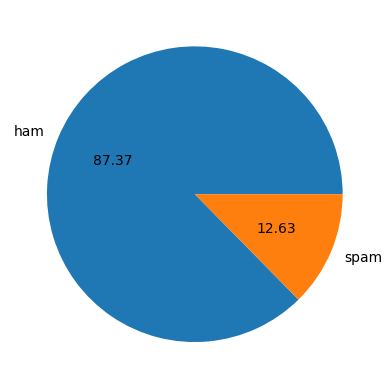

In [ ]:
plt.pie(data["Target"].value_counts(), labels = ["ham", "spam"], autopct = "%0.2f")
plt.show()

In [ ]:
## data is imbalanced
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data["num_characters"] = data["text"].apply(len)

<ipython-input-311-56f0ba2398b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["num_characters"] = data["text"].apply(len)


In [ ]:
 data.head()

,Target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#number of words
data["num_words"] = data["text"].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-313-298441d54e0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["num_words"] = data["text"].apply(lambda x:len(nltk.word_tokenize(x)))


In [ ]:
data.head()

,Target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
data["num_sentences"] = data["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-315-a6cd863275e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["num_sentences"] = data["text"].apply(lambda x:len(nltk.sent_tokenize(x)))


In [ ]:
data.head()

,Target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
data[["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
data[data["Target"]==0][["num_characters", "num_words", "num_sentences"]].describe() # for ham

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
data[data["Target"]==1][["num_characters", "num_words", "num_sentences"]].describe() # for spam

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

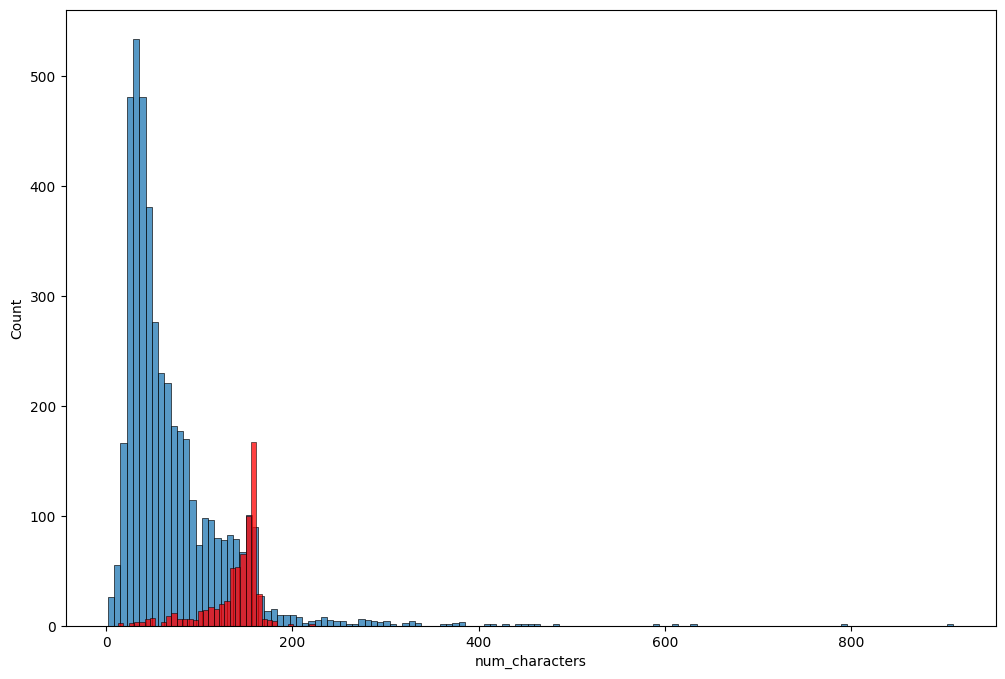

In [ ]:
plt.figure(figsize = (12,8))
sns.histplot(data[data["Target"]==0]["num_characters"])
sns.histplot(data[data["Target"]==1]["num_characters"], color = "red")

<Axes: xlabel='num_words', ylabel='Count'>

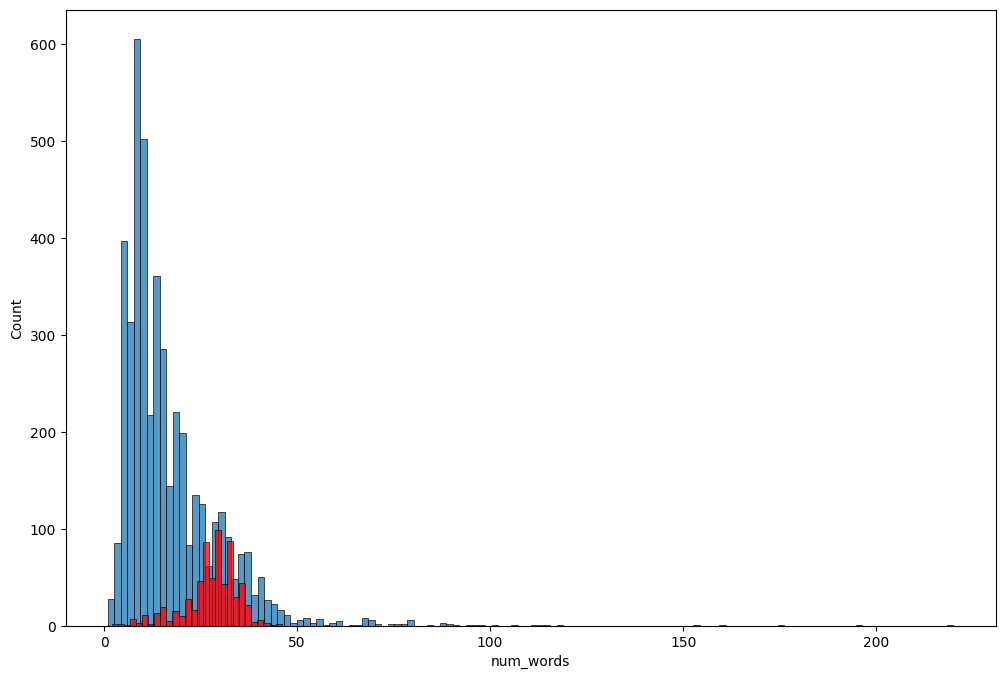

In [ ]:
plt.figure(figsize = (12,8))
sns.histplot(data[data["Target"]==0]["num_words"])
sns.histplot(data[data["Target"]==1]["num_words"], color = "red")

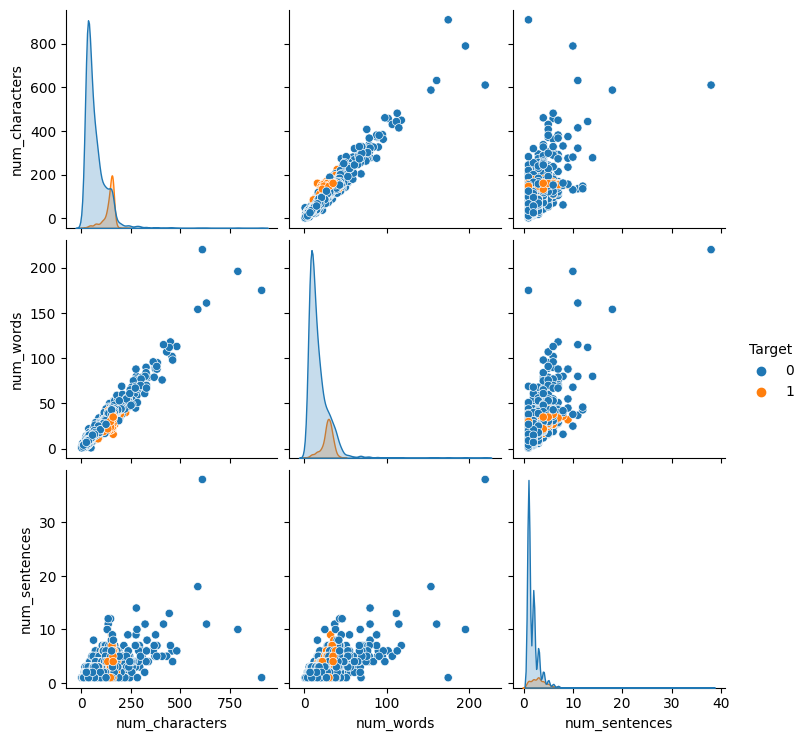

In [ ]:
sns.pairplot(data, hue = "Target") # wre have outliers in our data

In [ ]:
data.corr()

<ipython-input-323-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Target,num_characters,num_words,num_sentences
Target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<ipython-input-324-1f756df288d0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

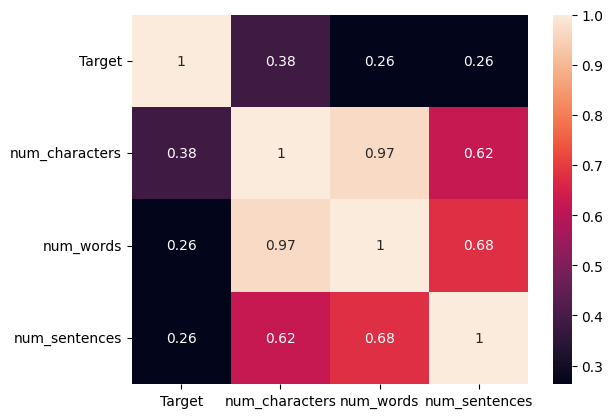

In [ ]:
sns.heatmap(data.corr(), annot = True)

# Data Preprocessing


*   lower case
*   tokenization
*   removing special characters
*   removing stop words and puntuation
*   stemming







In [ ]:
# Get the English stopwords
nltk.download('stopwords')
stopwords_list = stopwords.words('english')
# You can print the stopwords if you want to see them
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
ps = PorterStemmer()
ps.stem("loving")

'love'

In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words("english") and i not in  string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()


  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
transform_text("I loved YT lectures on Machine Learing. How about you??")

'love yt lectur machin lear'

In [ ]:
data["transformed_text"] = data["text"].apply(transform_text)

<ipython-input-330-f76034ac9568>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["transformed_text"] = data["text"].apply(transform_text)


In [ ]:
data.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = "white")
spam_wc = wc.generate(data[data["Target"] == 1]["transformed_text"].str.cat(sep = " "))

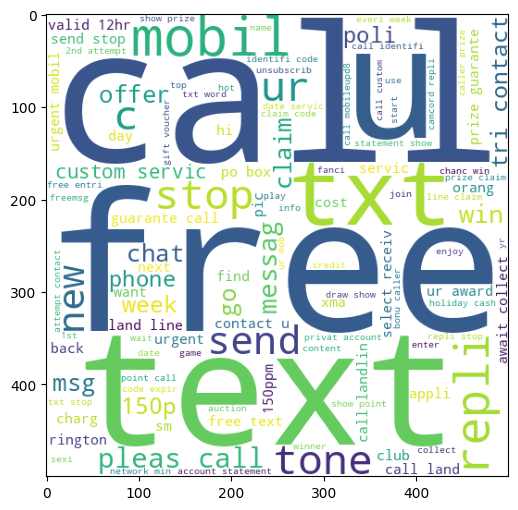

In [ ]:
plt.figure(figsize = (12,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(data[data["Target"] == 0]["transformed_text"].str.cat(sep = " "))

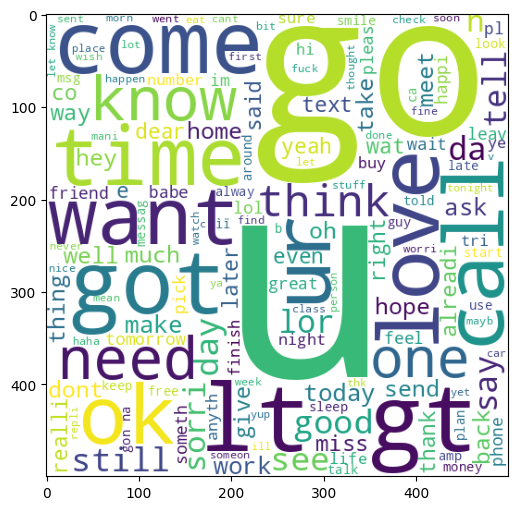

In [ ]:
plt.figure(figsize = (12,6))
plt.imshow(ham_wc)

In [ ]:
data.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in data[data["Target"] == 1]["transformed_text"].tolist():
  for word in msg.split():
     spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
Counter(spam_corpus).most_common(30) # gives a dictionary provididng how many times each woprd is repeaated.
pd.DataFrame(Counter(spam_corpus).most_common(30)) # making a dataframe of  the dictionary


,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [ ]:
ham_corpus = []
for msg in data[data["Target"] == 0]["transformed_text"].tolist():
  for word in msg.split():
     ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

In [ ]:
Counter(spam_corpus).most_common(30) # gives a dictionary provididng how many times each woprd is repeaated.
pd.DataFrame(Counter(spam_corpus).most_common(30)) # making a dataframe of  the dictionary

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


# Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
# tfidf = TfidfVectorizer()

In [ ]:
x = cv.fit_transform(data["transformed_text"]).toarray()

In [ ]:
x.shape

(5169, 6708)

In [ ]:
y = data["Target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 7)

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[767 119]
 [ 16 132]]
0.5258964143426295


In [ ]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9758220502901354
[[871  15]
 [ 10 138]]
0.9019607843137255


In [ ]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9671179883945842
[[882   4]
 [ 30 118]]
0.9672131147540983


In [ ]:
tfidf = TfidfVectorizer(max_features = 3000)

In [ ]:
x = tfidf.fit_transform(data["transformed_text"]).toarray()

In [ ]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [ ]:
y = data["Target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 7)

In [ ]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.851063829787234
[[754 132]
 [ 22 126]]
0.4883720930232558


In [ ]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9729206963249516
[[877   9]
 [ 19 129]]
0.9347826086956522


In [ ]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.97678916827853
[[883   3]
 [ 21 127]]
0.9769230769230769


In [ ]:
# tfidf ---> MNB

In [ ]:
svc = SVC(kernel = "sigmoid", gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = "liblinear", penalty = "l1")
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 5, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 5, random_state = 2)
gdbt = GradientBoostingClassifier(n_estimators = 5, random_state = 2)
xgb = XGBClassifier(n_estimators = 5, random_state = 2)

In [ ]:
clfs = {
    "SVC" : svc,
    "KN"  : knc,
    "NB"  : mnb,
    "DT"  : dtc,
    "LR"  : lrc,
    "RF"  : rfc,
    "AdaBoost": abc,
    "BC"  : bc,
    "ETC" : etc,
    "GDBT": gdbt,
    "XGB" : xgb
}

In [ ]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  return accuracy, precision

In [ ]:
train_classifier(svc,x_train, y_train, x_test, y_test)

(0.965183752417795, 0.9516129032258065)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    print(f"For {name}:")
    print(f"Accuracy - {current_accuracy}")
    print(f"Precision - {current_precision}")
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC:
Accuracy - 0.965183752417795
Precision - 0.9516129032258065
For KN:
Accuracy - 0.9013539651837524
Precision - 0.9791666666666666
For NB:
Accuracy - 0.9729206963249516
Precision - 0.9347826086956522
For DT:
Accuracy - 0.9342359767891683
Precision - 0.8773584905660378
For LR:
Accuracy - 0.9613152804642167
Precision - 0.9655172413793104
For RF:
Accuracy - 0.9738878143133463
Precision - 0.991869918699187
For AdaBoost:
Accuracy - 0.9584139264990329
Precision - 0.9133858267716536
For BC:
Accuracy - 0.9574468085106383
Precision - 0.8768115942028986
For ETC:
Accuracy - 0.9661508704061895
Precision - 0.937984496124031


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For GDBT:
Accuracy - 0.8568665377176016
Precision - 0.0
For XGB:
Accuracy - 0.9429400386847195
Precision - 0.9238095238095239


In [ ]:
performance_df = pd.DataFrame({"Algorithms" : clfs.keys(), "Accuracy" : accuracy_scores, "Precision" : precision_scores}).sort_values(by='Precision', ascending=False)

In [ ]:
performance_df

,Algorithms,Accuracy,Precision
5,RF,0.973888,0.991870
1,KN,0.901354,0.979167
4,LR,0.961315,0.965517
0,SVC,0.965184,0.951613
8,ETC,0.966151,0.937984
2,NB,0.972921,0.934783
10,XGB,0.942940,0.923810
6,AdaBoost,0.958414,0.913386
3,DT,0.934236,0.877358
7,BC,0.957447,0.876812


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithms")

In [ ]:
performance_df1

,Algorithms,variable,value
0,RF,Accuracy,0.973888
1,KN,Accuracy,0.901354
2,LR,Accuracy,0.961315
3,SVC,Accuracy,0.965184
4,ETC,Accuracy,0.966151
5,NB,Accuracy,0.972921
6,XGB,Accuracy,0.942940
7,AdaBoost,Accuracy,0.958414
8,DT,Accuracy,0.934236
9,BC,Accuracy,0.957447


# Model Impriovement

In [ ]:
# change the max feature paramter of tfidf
temp_df = pd.DataFrame({"Algorithms" : clfs.keys(), "Accuracy_max_feature_3000" : accuracy_scores, "Precision_max_feature_3000" : precision_scores})

In [ ]:
temp_df = pd.DataFrame({"Algorithms" : clfs.keys(), "Accuracy_scaling" : accuracy_scores, "Precision_scaling" : precision_scores})

In [ ]:
new_df = performance_df.merge(temp_df, on = "Algorithms") #there isn't any changes after applying ,max_feature = 3000

In [ ]:
new_df_scaled = new_df.merge(temp_df, on = "Algorithms")

In [ ]:
new_df_scaled

,Algorithms,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,RF,0.973888,0.991870,0.973888,0.991870,0.973888,0.991870
1,KN,0.901354,0.979167,0.901354,0.979167,0.901354,0.979167
2,LR,0.961315,0.965517,0.961315,0.965517,0.961315,0.965517
3,SVC,0.965184,0.951613,0.965184,0.951613,0.965184,0.951613
4,ETC,0.966151,0.937984,0.966151,0.937984,0.966151,0.937984
5,NB,0.972921,0.934783,0.972921,0.934783,0.972921,0.934783
6,XGB,0.942940,0.923810,0.942940,0.923810,0.942940,0.923810
7,AdaBoost,0.958414,0.913386,0.958414,0.913386,0.958414,0.913386
8,DT,0.934236,0.877358,0.934236,0.877358,0.934236,0.877358
9,BC,0.957447,0.876812,0.957447,0.876812,0.957447,0.876812


In [ ]:
# voting classifier
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
knc = KNeighborsClassifier()
lrc = LogisticRegression(solver = "liblinear", penalty = "l1")

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators = [("RF", rfc), ("KN", knc), ("LR", lrc)], voting = "soft")

In [ ]:
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('KN', KNeighborsClassifier()),
                             ('LR',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear'))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(x_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9564796905222437
Precision 0.9813084112149533


In [ ]:
## apply stacking
estimators = [("RF", rfc), ("KN", knc), ("LR", lrc)]
final_estimator = RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator)

In [ ]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9700193423597679
Precision 0.8874172185430463


In [ ]:
import pickle
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(mnb, open("model.pkl", "wb"))